In [1]:
import pandas as pd

data = pd.read_csv("kommune_clean.csv")
data.head()

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,5,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0


In [2]:
data.shape

(3359, 97)

In [3]:
numerical_8 = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_7","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2","Q66a_1"]

numerical_7_9999 = ['Q5_1', 'Q6_1', 'Q7_1', 'Q10_1', ] 

numerical = ['Id', 'Q53a', 'Q54a'] 
#remember to not include 'Id' in the models

ja_nei_usikker = ['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q18']

categorical = ['Spraak', 'Q16', 'Q46a', 'Q48a','Q52a', 'Q60a', 'Q62a', 'Alderkat', 'Q56a', 
               'Q61a', 'Kommunestr', 'Fylke', 'Q49a', 'Sentralitet', 'Q57a', 'Q58a', 'Q63a', 
               'Q67a']

boolean = ['Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q64a_1', 'Q64a_2', 'Q64a_3', 
           'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 
           'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q68a']

Feature imputation: 
https://scikit-learn.org/stable/modules/impute.html#impute

## Unvariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

### For 1-8 vars where I want to remove the 8 values

#### Using median

In [5]:
#fixing nan values in the entire set
imp = SimpleImputer(missing_values=np.nan, strategy='median')
median_nan = imp.fit_transform(data[numerical_8])

In [6]:
#fixing 9999 values in the entire set
imp = SimpleImputer(missing_values=8, strategy='median')
median_8 = imp.fit_transform(median_nan)

In [7]:
data_unvariate = data.copy()
data_unvariate[numerical_8] = median_8
pd.DataFrame(data_unvariate).head(20)

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,6.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,5,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0
5,6,2.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,...,2.0,12,5.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0
6,7,1.0,7.0,7.0,7.0,6.0,6.0,4.0,4.0,4.0,...,2.0,8,5.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0
7,8,1.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,4.0,...,4.0,3,4.0,4.0,1.0,1.0,4.0,1.0,4.0,2.0
8,9,1.0,4.0,6.0,5.0,6.0,3.0,3.0,2.0,3.0,...,3.0,2,4.0,4.0,NaN,0.0,4.0,1.0,NaN,NaN
9,10,1.0,7.0,7.0,7.0,7.0,7.0,6.0,4.0,7.0,...,1.0,18,5.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0


#### Evaluate the three different and which one should I use?

In [ ]:
#I'll just use median. especially since the data is scewed.
#but how can I evaluate how well it worked so I can compare it to multivariate feature imputation?

## Multivariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [8]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
#fixing nan values in the entire set
imp = IterativeImputer(missing_values=np.nan, max_iter=10, random_state=0)
multivariate_nan = imp.fit_transform(data[numerical_8])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [10]:
imp = IterativeImputer(missing_values=8, max_iter=10, random_state=0)
multivariate_8 = imp.fit_transform(multivariate_nan)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [11]:
data_multivariate = data.copy()
data_multivariate[numerical_8] = multivariate_8
pd.DataFrame(data_multivariate).head(20)

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.000000,6.000000,6.000000,6.000000,4.000000,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,2,1.0,5.0,3.0,3.0,6.000000,4.000000,6.000000,4.000000,5.000000,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,3,1.0,7.0,6.0,6.0,6.000000,6.000000,4.000000,5.000000,5.984943,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,4,1.0,6.0,6.0,3.0,3.000000,2.000000,2.000000,2.000000,4.000000,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,5,1.0,4.0,7.0,6.0,5.000000,5.000000,5.000000,1.000000,6.000000,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0
5,6,2.0,7.0,7.0,7.0,6.000000,6.000000,5.000000,5.000000,5.000000,...,2.0,12,5.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0
6,7,1.0,7.0,7.0,7.0,6.000000,5.736228,4.000000,4.000000,4.000000,...,2.0,8,5.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0
7,8,1.0,6.0,2.0,6.0,2.000000,2.000000,6.000000,6.000000,4.000000,...,4.0,3,4.0,4.0,1.0,1.0,4.0,1.0,4.0,2.0
8,9,1.0,4.0,6.0,5.0,2.918514,3.000000,3.000000,2.000000,3.000000,...,3.0,2,4.0,4.0,NaN,0.0,4.0,1.0,NaN,NaN
9,10,1.0,7.0,7.0,7.0,7.000000,7.000000,6.000000,4.000000,7.000000,...,1.0,18,5.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0


In [12]:
data.head(20)

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,5,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0
5,6,2.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,...,2.0,12,5.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0
6,7,1.0,7.0,7.0,7.0,6.0,8.0,4.0,4.0,4.0,...,2.0,8,5.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0
7,8,1.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,4.0,...,4.0,3,4.0,4.0,1.0,1.0,4.0,1.0,4.0,2.0
8,9,1.0,4.0,6.0,5.0,8.0,3.0,3.0,2.0,3.0,...,3.0,2,4.0,4.0,NaN,0.0,4.0,1.0,NaN,NaN
9,10,1.0,7.0,7.0,7.0,7.0,7.0,6.0,4.0,7.0,...,1.0,18,5.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0


In [13]:
print(data_multivariate.shape)
data_multivariate = data.dropna() #just doing this for now, as I cant be bothered to deal with it
print(data_multivariate.shape)

import random

#random.seed(2809)
#random.shuffle(data)

data_multivariate = data_multivariate[data_multivariate.Q16 != 11.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 12.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 13.0]

dev_test = data_multivariate[:100] # maybe I should not priorotize having thissince my data is so small?
#final_test = data[370:740]
train = data_multivariate[100:]

from sklearn import tree

target = train["Q16"]
train_x = train.drop(['Q16'],axis=1).values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, target)

predictions = clf.predict(dev_test.drop(['Q16'],axis=1).values)
print(predictions)
print(list(dev_test['Q16']))
target = list(dev_test['Q16'])

accuracy = sum(1 for x,y in zip(predictions,target) if x == y) / len(predictions)

print(accuracy)

(3359, 97)
(1843, 97)
[ 4.  1.  6.  5.  5.  1.  1.  3.  3.  6.  7.  1.  3.  9.  3.  3.  2.  3.
  8.  2.  1.  9.  1.  1.  3.  3.  9.  7.  3.  7.  8.  3.  3.  7.  8.  9.
  7.  6.  4.  1.  1.  3.  3.  5.  3.  3.  1.  3.  1.  3.  8.  3.  1.  3.
  3.  5.  2.  3.  3.  3.  3.  1.  3.  3.  2.  9.  1.  1.  1.  5.  9.  1.
  3.  3.  2.  7.  1.  8.  1.  9.  9.  1.  2.  1.  1.  4. 10.  1.  7.  9.
  5.  8.  2.  2.  3.  2.  6.  7.  3.  7.]
[7.0, 1.0, 9.0, 9.0, 5.0, 7.0, 1.0, 2.0, 3.0, 8.0, 2.0, 1.0, 5.0, 6.0, 3.0, 9.0, 1.0, 2.0, 6.0, 7.0, 5.0, 1.0, 7.0, 10.0, 1.0, 5.0, 1.0, 1.0, 3.0, 1.0, 3.0, 4.0, 10.0, 1.0, 8.0, 3.0, 7.0, 3.0, 7.0, 3.0, 3.0, 3.0, 1.0, 9.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 9.0, 1.0, 8.0, 10.0, 2.0, 1.0, 4.0, 2.0, 3.0, 3.0, 10.0, 8.0, 7.0, 8.0, 1.0, 3.0, 3.0, 9.0, 7.0, 1.0, 7.0, 3.0, 6.0, 3.0, 1.0, 7.0, 3.0, 9.0, 9.0, 5.0, 3.0, 4.0, 3.0, 4.0, 3.0, 7.0, 3.0, 1.0, 8.0, 8.0, 8.0, 1.0, 3.0, 8.0, 3.0, 3.0, 5.0, 3.0]
0.24


In [14]:
# TODO check what the accuracy is if I look at the top 2 predictions for each. (check if this is even statistically interesting information)

# What other ways can i evaluate my model?

[Text(829.1788377875556, 1066.2923076923078, 'Q64a_8 <= 0.5\ngini = 0.826\nsamples = 1350\nvalue = [359, 122, 363, 61, 96, 39, 102, 101, 74, 33]'),
 Text(580.2410142795908, 1024.4769230769232, 'Kommunestr <= 3.5\ngini = 0.818\nsamples = 1270\nvalue = [347, 117, 353, 32, 90, 37, 96, 96, 71, 31]'),
 Text(357.9524201157398, 982.6615384615385, 'Q58a <= 1.5\ngini = 0.817\nsamples = 839\nvalue = [249, 94, 207, 26, 33, 20, 89, 50, 47, 24]'),
 Text(124.2136945659946, 940.8461538461539, 'Q56a <= 1.5\ngini = 0.819\nsamples = 592\nvalue = [154, 80, 163, 18, 22, 12, 54, 35, 35, 19]'),
 Text(7.193038994521431, 899.0307692307692, 'Id <= 115055.0\ngini = 0.705\nsamples = 49\nvalue = [24, 7, 6, 2, 0, 0, 6, 2, 2, 0]'),
 Text(5.274895262649049, 857.2153846153847, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(9.111182726393812, 857.2153846153847, 'Fylke <= 3.5\ngini = 0.681\nsamples = 46\nvalue = [24, 4, 6, 2, 0, 0, 6, 2, 2, 0]'),
 Text(3.836287463744763, 815.4000000000001, 'Q

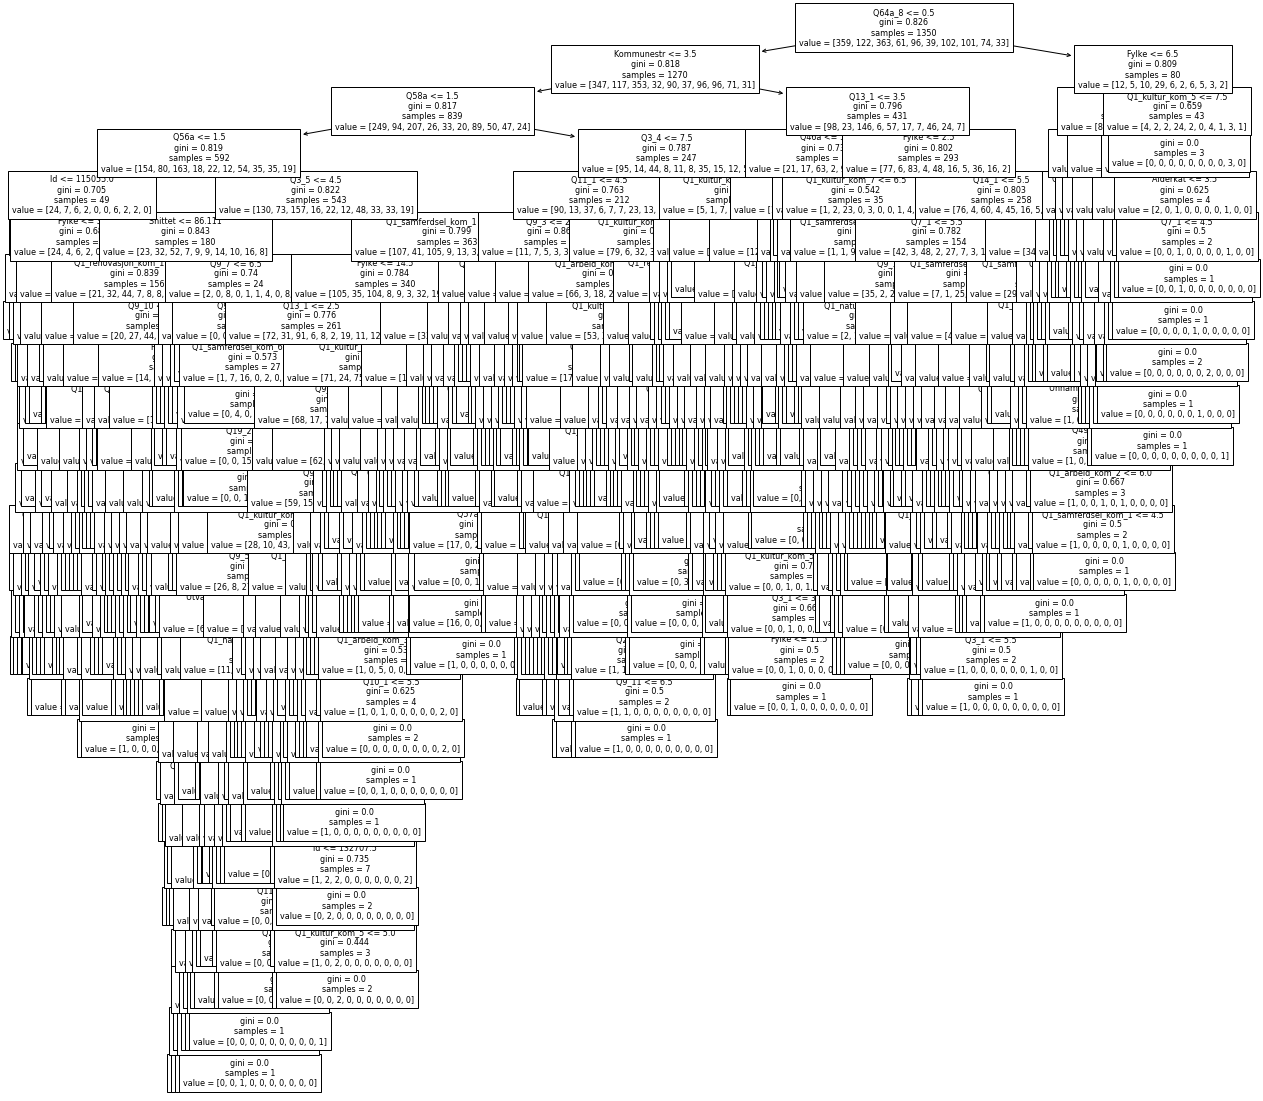

In [26]:
import matplotlib.pyplot as plt
#print(list(train.drop(['Q16'],axis=1)))
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=list(train.drop(['Q16'],axis=1)))